In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
import torch
from sam2.sam2_image_predictor import SAM2ImagePredictor
from pathlib import Path
from PIL import Image
from segmenter_api.utils.image import draw_bbox
import numpy as np

In [3]:
predictor = SAM2ImagePredictor.from_pretrained("facebook/sam2-hiera-large")

In [4]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path)

In [5]:
boxes = [
    [252.416015625, 186.8800048828125, 518.656005859375, 740.864013671875],
    [295.42401123046875, 542.2080078125, 501.2480163574219, 733.696044921875],
]

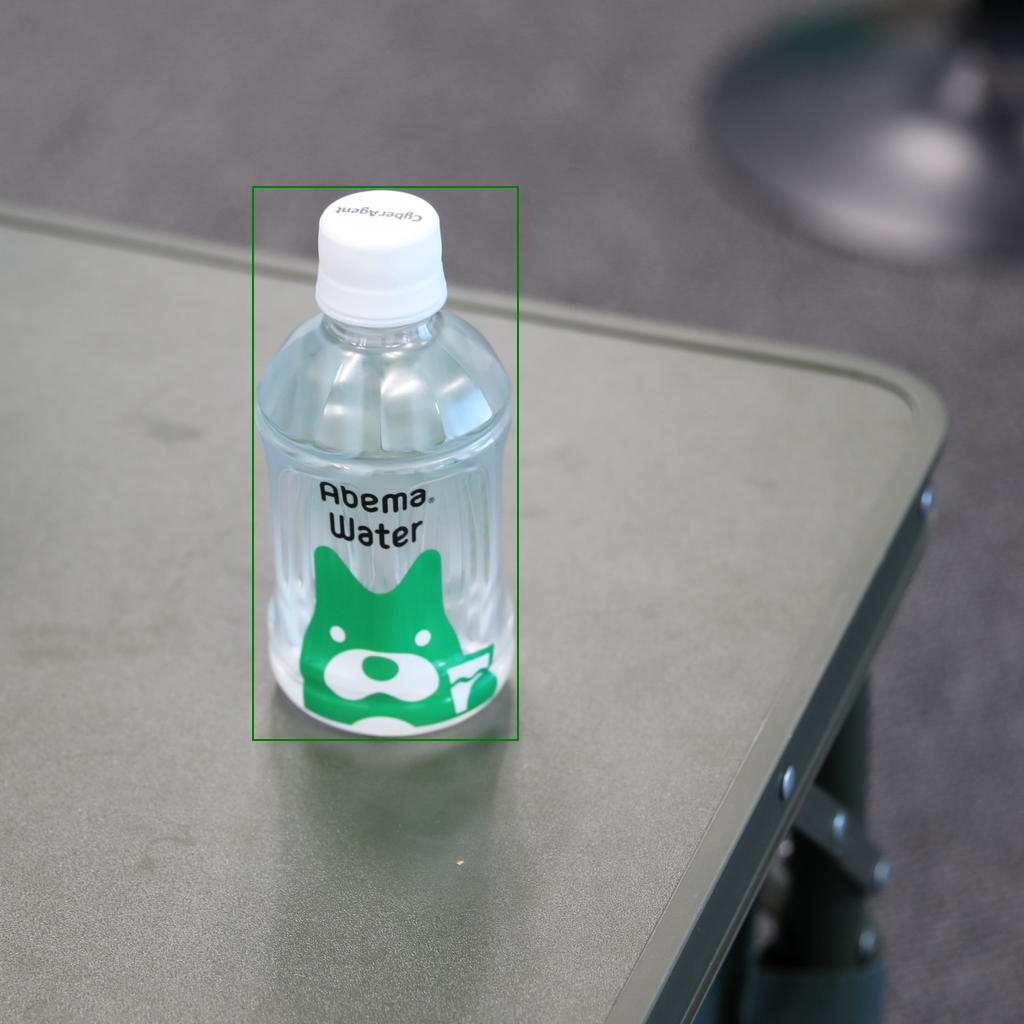

In [6]:
draw_bbox(image=image, bbox=boxes[0])

In [7]:
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(image=image.convert("RGB"))
    masks, _, _ = predictor.predict(
        box=boxes,
        multimask_output=False,
    )
if masks.ndim == 4:
    masks = masks.squeeze(1)
masks = np.uint8(masks) * 255
segments: list[Image.Image] = []
mask_images: list[Image.Image] = []
for mask in masks:
    mask_image = Image.fromarray(mask)
    segment = Image.composite(
        image1=image.convert("RGBA"),
        image2=Image.new("RGBA", image.size),
        mask=mask_image,
    )
    mask_images.append(mask_image)
    segments.append(segment)

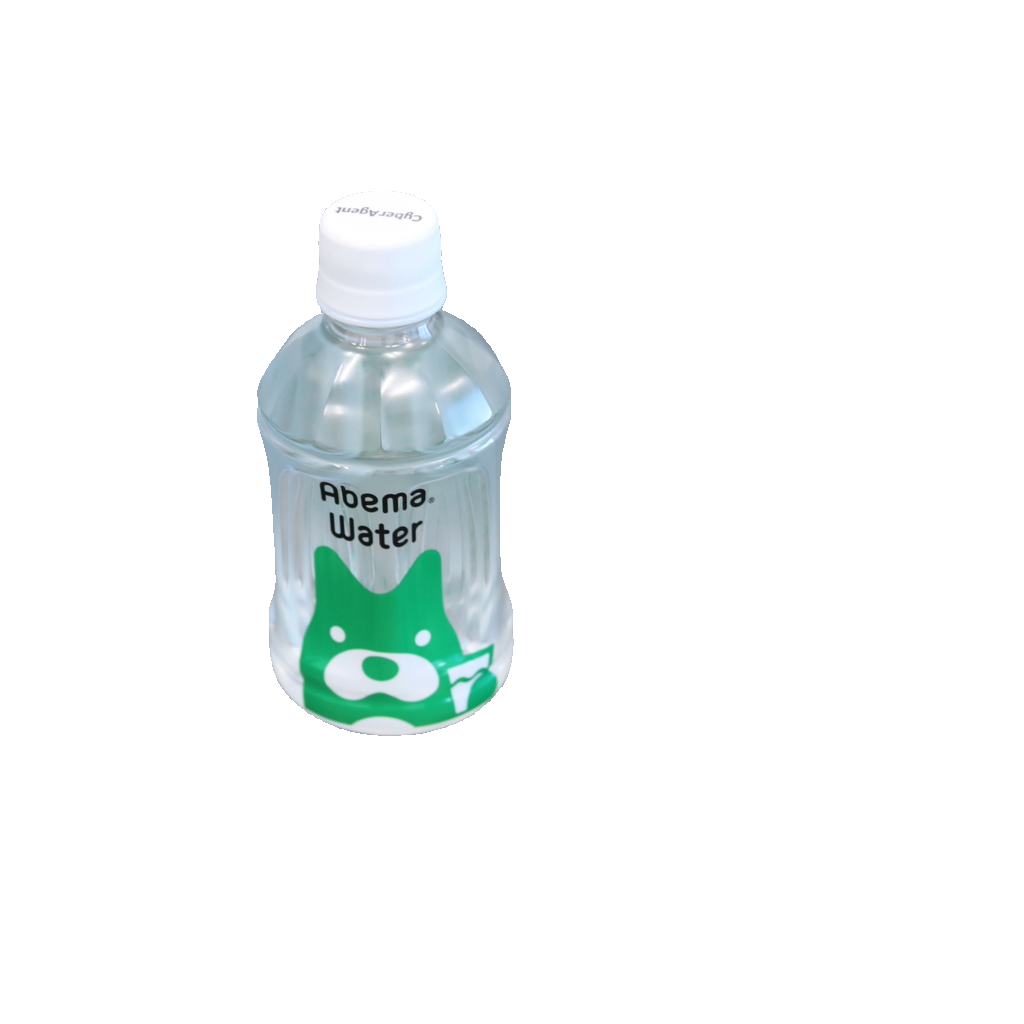

In [8]:
segments[0]

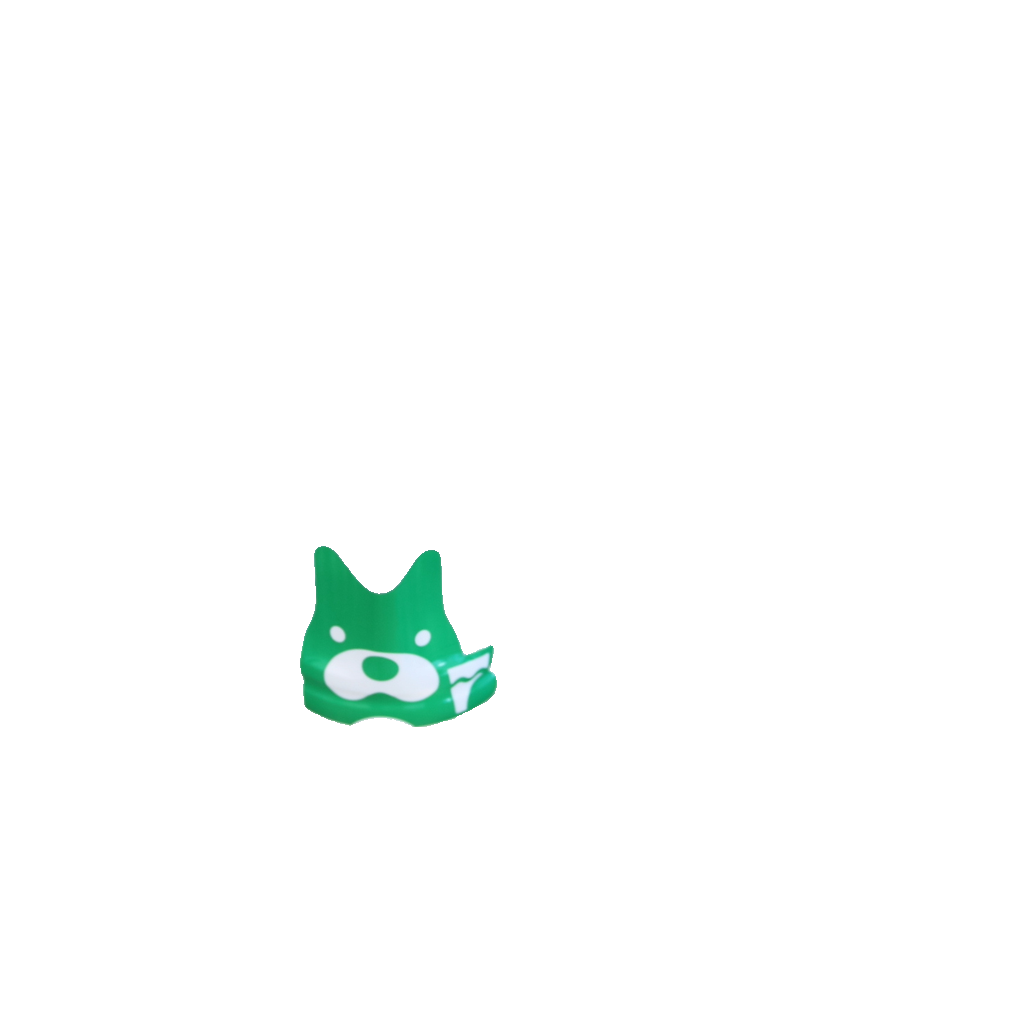

In [9]:
segments[1]